### Chapter 2. Numerical solution methods

Reference: 
Fehr, H. and Kindermann, F. 2018. The overlapping generations model. <i>Introduction to Computational Economics Using Fortran.</i> Oxford University Press. pp39-110.

In [1]:
##### Program 2.1 Matrix and vector operations

# Import package
import numpy as np


# Initialize vectors and matrics

# A vector is a one-dimensional array. You can create a vector from a list of numbers.
# Optionally, you can tell numpy the type of the entries. The 'float' for real number and
# 'int' for intergers.
a = np.array([4,3,2,1],dtype='float')
print('vector a = ', a)


#You can use np.arange(a,b,c) to create a sequence of numbers. The sequence starts from 'a' 
#and continues with 'a+c, a+2c,...' until 'b-1'. If 'b-1' is not in the sequence, the 
#sequence ends with the number that is in this sequence and is closest to 'b-1'.
a = np.arange(4,0,-1) 


# The '+' is used for element-wise sum.
b = a + 4


# You can use np.zeros((a,b)) to create an a*b matrix with all zero entries.
x = np.zeros((2,4))
print('matrix x = ', x)


# Numpy enables us to slicing the matrix easily. x[a,b] means the entry of x located at
# a^th row and b^th column. x[:a,b] means the first entries located ata rows and b^th column.
# x[a,:] means all the entries in a^th row. We can use '=' to replace the entries 
# that we slicing.
x[0,:] = np.arange(1,5)
x[1,:] = np.arange(5,9)
print('matrix x = ', x)


# Using matrix.T to transpose the matrix.
y = x.T
print('transpose of x = ', y)


# Using A@B to multiply two matrices.
z = x@y
print('standard product of x, y = ', z)


# Using A*B to entry-wisely multiply A and B.
w = y.T*x
print('element-wise multiplication of x,y = ', w)


# To produce summary data, we can either collect information for each row or column, 
# or for the whole matrix:

# Maximum entry in each row
print("Row maxima =", np.max(x, axis=0))


# Maximum entry in each column
print("Col maxima =", np.max(x, axis=1))


# Maximum entry in the whole matrix
print("Overall maximum =", np.max(x))



vector a =  [4. 3. 2. 1.]
matrix x =  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
matrix x =  [[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
transpose of x =  [[1. 5.]
 [2. 6.]
 [3. 7.]
 [4. 8.]]
standard product of x, y =  [[ 30.  70.]
 [ 70. 174.]]
element-wise multiplication of x,y =  [[ 1.  4.  9. 16.]
 [25. 36. 49. 64.]]
Row maxima = [5. 6. 7. 8.]
Col maxima = [4. 8.]
Overall maximum = 8.0


In [2]:
##### Program 2.2 Linear equation-solving

import numpy as np
import scipy.linalg as linalg

# Initialize vectors and matrics
Q = np.zeros((3,3))
Q[0,:] = ([2,0,1])
Q[1,:] = ([0,4,1])
Q[2,:] = ([1,1,2])
b = np.array([30,40,30])

# Factorise Q


# scipy.linalg.lu_factor factorise Q as P,L,U and store them efficiently (L and U in one 
# n*n matrix and P as a vector of integers). For more information, see scipy.linalg.lu_factor
# document.
LU, piv1 = linalg.lu_factor(Q)
print('P =', piv1)
print('LU =', LU)


# Alternatively, we can use scipy.linalg.lu to factorise Q=PLU and store P, L, U in
# n*n matries. However, this is not the optimal way to store them for large systems 
# (it takes too much memory).

piv2, L, U = linalg.lu(Q)
print('P =', piv2)
print('L =', L)
print('U =', U)


P = [0 1 2]
LU = [[2.   0.   1.  ]
 [0.   4.   1.  ]
 [0.5  0.25 1.25]]
P = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
L = [[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.5  0.25 1.  ]]
U = [[2.   0.   1.  ]
 [0.   4.   1.  ]
 [0.   0.   1.25]]


In [3]:
##### Program 2.2 Linear equation-solving

# Solve the system

# Using np.linalg.solve it directly
p = np.linalg.solve(Q,b)
print('p1, p2, p3 =',p[0],p[1],p[2])

# Using scipy.linalg.lu_solve to solve for p with the pre-calculated P, LU (store efficiently)
p = linalg.lu_solve((LU,piv1),b)
print('p1, p2, p3 =',p[0],p[1],p[2])

p1, p2, p3 = 13.0 9.0 4.0
p1, p2, p3 = 13.0 9.0 4.0


In [23]:
##### Program 2.3 Inversion of matrix

# Import package
import numpy as np
import scipy.linalg as linalg
from numpy.linalg import inv

# Set up matrix and vector
Q = np.zeros((3,3))
Q[0,:] = ([2,0,1])
Q[1,:] = ([0,4,1])
Q[2,:] = ([1,1,2])
b = np.array([30,40,30])

# Invert Q
Q_inv = inv(Q)
print('Q^-1 = ', Q_inv)

# Calculate solution
p = Q_inv @ b
print('p = ', p)

Q^-1 =  [[ 0.7  0.1 -0.4]
 [ 0.1  0.3 -0.2]
 [-0.4 -0.2  0.8]]
p =  [13.  9.  4.]


In [24]:
# Import package
import numpy as np
import scipy.linalg as linalg
from numpy.linalg import inv

# Function that generates Hilbert Matrix
def hilbert (n):
    A = np. zeros ((n,n))
    for i in range (n):
        for j in range (n):
            A[i,j ]=1/( i+j+1)
    return A
A = hilbert(15)
b = A[: ,0]

# Solving for x by x=A^-1b
A_inv = np.linalg.inv(A)
x = A_inv @ b
print('False x = ', x)

# Solving for x by SciPy
LU, piv1 = linalg.lu_factor(A)
x = linalg.lu_solve((LU,piv1),b)
print('True x =',x)

False x =  [ 5.78079768e-01  2.55232048e+00 -1.75178833e+01  6.16191406e+01
 -3.47109375e+01 -1.74031250e+02  3.51281250e+02 -2.76750000e+02
  9.41250000e+01  6.50000000e+00 -2.00000000e+01  7.00000000e+00
 -1.50000000e+00  0.00000000e+00 -6.25000000e-02]
True x = [ 1.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.]


In [25]:
##### Program 2.4 Jacobi iteration-Matrix form

# Import package
import numpy as np

# Set up matrix and vector
A = np.zeros((3,3))
A[0,:] = ([2,0,1])
A[1,:] = ([0,4,1])
A[2,:] = ([1,1,2])
b = np.array([30,40,30])
ID = np.zeros((3,3))
Dinv = np.zeros((3,3))
for i in range(3):
    ID[i,i] = 1
    Dinv[i,i] = 1/A[i,i]

# Calculate iteratin matrix and vector
C = ID - np.matmul(Dinv, A)
d = np.matmul(Dinv, b)

# Initialize xold
xold = np.zeros(3)

# Start interation
for iter in range(1,201):
    x = d + np.matmul(C, xold)
    print('Iter: ', iter, np.amax(abs(x-xold)))
    # check for convergence
    if np.amax(abs(x-xold)) < 1e-6: 
        print('x = ', x)
        break
    else:
        xold = x

Iter:  1 15.0
Iter:  2 12.5
Iter:  3 6.25
Iter:  4 4.6875
Iter:  5 2.34375
Iter:  6 1.7578125
Iter:  7 0.87890625
Iter:  8 0.6591796875
Iter:  9 0.32958984375
Iter:  10 0.2471923828125
Iter:  11 0.12359619140625
Iter:  12 0.0926971435546875
Iter:  13 0.04634857177734375
Iter:  14 0.03476142883300781
Iter:  15 0.017380714416503906
Iter:  16 0.01303553581237793
Iter:  17 0.006517767906188965
Iter:  18 0.004888325929641724
Iter:  19 0.002444162964820862
Iter:  20 0.0018331222236156464
Iter:  21 0.0009165611118078232
Iter:  22 0.0006874208338558674
Iter:  23 0.0003437104169279337
Iter:  24 0.00025778281269595027
Iter:  25 0.00012889140634797513
Iter:  26 9.666855476098135e-05
Iter:  27 4.8334277380490676e-05
Iter:  28 3.625070803536801e-05
Iter:  29 1.8125354017684003e-05
Iter:  30 1.3594015513263003e-05
Iter:  31 6.797007756631501e-06
Iter:  32 5.097755817473626e-06
Iter:  33 2.548877908736813e-06
Iter:  34 1.9116584315526097e-06
Iter:  35 9.558292166644833e-07
x =  [13.00000011  9.000000

In [26]:
##### Program 2.4 Jacobi iteration

# Import package
import numpy as np

# Set up matrix and vector
Q = np.zeros((3,3))
Q[0,:] = ([2,0,1])
Q[1,:] = ([0,4,1])
Q[2,:] = ([1,1,2])
b = np.array([30,40,30])

# Initialize p_old
p_old = np.array([0.0,0.0,0.0])
p = p_old.copy()

# Start interation
for iter in range(1,201):
    for i in range(len(b)):
        Q1 = np.append(Q[i,:i],Q[i,i+1:])
        p1 = np.append(p_old[:i],p_old[i+1:])
        sumterm = Q1 @ p1
        p[i] = (1/Q[i,i])*(b[i] - sumterm)
    print('Iter: ', iter, np.linalg.norm(p-p_old))
    # check for convergence
    if np.linalg.norm(p-p_old) < 1e-8:
        print('p = ', p)
        break
    else:
        p_old = p.copy()

Iter:  1 23.45207879911715
Iter:  2 15.051993223490369
Iter:  3 8.970437559004578
Iter:  4 5.644497458808888
Iter:  5 3.3639140846267166
Iter:  6 2.1166865470533334
Iter:  7 1.2614677817350186
Iter:  8 0.793757455145
Iter:  9 0.47305041815063203
Iter:  10 0.29765904567937496
Iter:  11 0.177393906806487
Iter:  12 0.11162214212976562
Iter:  13 0.06652271505243262
Iter:  14 0.04185830329866211
Iter:  15 0.024946018144662234
Iter:  16 0.01569686373699829
Iter:  17 0.009354756804248339
Iter:  18 0.0058863239013743586
Iter:  19 0.0035080338015931268
Iter:  20 0.0022073714630153844
Iter:  21 0.0013155126755974226
Iter:  22 0.0008277642986307692
Iter:  23 0.0004933172533490334
Iter:  24 0.00031041161198653845
Iter:  25 0.00018499397000588754
Iter:  26 0.00011640435449495191
Iter:  27 6.937273875220783e-05
Iter:  28 4.365163293560697e-05
Iter:  29 2.6014777032077935e-05
Iter:  30 1.6369362350852613e-05
Iter:  31 9.755541387029226e-06
Iter:  32 6.13851088156973e-06
Iter:  33 3.65832802013596e-06

In [58]:
import numpy as np
def bisect(f, inita, initb, tol):
    # Check whether [a,b] bound a root
    if f(inita)*f(initb) < 0:
        print("The scalars a and b do not bound a root")
        
    fval = tol + 1.0 # we need a initial value of f
    a = inita # initial value of a
    b = initb # initial value of b
    
    while abs(fval) > tol:
        m = (a+b)/2.0
        fval = f(m)
        if f(a)*fval < 0.0:
            b = m
        else:
            a = m
        print("a=%5.15e, b=%5.15e, m=%5.15e, f(m)=%5.15e"%(a,b,m,f(m)))
    return m, f(m)

In [59]:
def f(x):
    
    f = 0.5 * x ** (-0.2) + 0.5 * x ** (-0.5) - 2
    
    return f

In [60]:
a = 0.05
b = 0.25
tol = 1e-6

x = bisect(f, a, b, tol)
print('x = ', x[0], 'f = ', x[1])

The scalars a and b do not bound a root
a=1.500000000000000e-01, b=2.500000000000000e-01, m=1.500000000000000e-01, f(m)=2.171572454676829e-02
a=1.500000000000000e-01, b=2.000000000000000e-01, m=2.000000000000000e-01, f(m)=-1.921011805194976e-01
a=1.500000000000000e-01, b=1.750000000000000e-01, m=1.750000000000000e-01, f(m)=-9.623461834656322e-02
a=1.500000000000000e-01, b=1.625000000000000e-01, m=1.625000000000000e-01, f(m)=-4.053602562256731e-02
a=1.500000000000000e-01, b=1.562500000000000e-01, m=1.562500000000000e-01, f(m)=-1.030927225495271e-02
a=1.531250000000000e-01, b=1.562500000000000e-01, m=1.531250000000000e-01, f(m)=5.467220304518072e-03
a=1.531250000000000e-01, b=1.546875000000000e-01, m=1.546875000000000e-01, f(m)=-2.478563016349744e-03
a=1.539062500000000e-01, b=1.546875000000000e-01, m=1.539062500000000e-01, f(m)=1.479765349631013e-03
a=1.539062500000000e-01, b=1.542968750000000e-01, m=1.542968750000000e-01, f(m)=-5.030170328050865e-04
a=1.541015625000000e-01, b=1.5429687

In [96]:
##### Program 2.5 Bisection search in one dimension

# Import package
import numpy as np

# Set initial guesses and function values
a = 0.05
b = 0.25
fa = 0.5 * a ** (-0.2) + 0.5 * a ** (-0.5) - 2
fb = 0.5 * b ** (-0.2) + 0.5 * b ** (-0.5) - 2

# Check whether there is a root in [a,b]
if fa * fb >= 0:
    print('Error: There is no root in [a, b]')

# Start iteration process
for iter in range(1,201):
    # calculate new bisection point and function value
    x = (a + b) / 2
    fx = 0.5 * x ** (-0.2) + 0.5 * x ** (-0.5) - 2
    print('Iter: ', iter, abs(x-a))
    # check for convergence
    if abs(x-a) < 1e-6:
        print('x = ', x, 'f = ', fx)
        break
    else:
        # calculate new interval
        if fa * fx < 0:
            b = x
            fb = fx
        else:
            a = x
            fa = fx
#print('Error: no convergence')

Iter:  1 0.09999999999999999
Iter:  2 0.05000000000000002
Iter:  3 0.024999999999999994
Iter:  4 0.012499999999999983
Iter:  5 0.0062500000000000056
Iter:  6 0.0031250000000000167
Iter:  7 0.0015624999999999944
Iter:  8 0.0007812500000000111
Iter:  9 0.0003906249999999778
Iter:  10 0.0001953124999999889
Iter:  11 9.765624999999445e-05
Iter:  12 4.88281250000111e-05
Iter:  13 2.4414062499977796e-05
Iter:  14 1.2207031249988898e-05
Iter:  15 6.1035156250222045e-06
Iter:  16 3.0517578125111022e-06
Iter:  17 1.5258789062277955e-06
Iter:  18 7.629394531138978e-07
x =  0.15419692993164064 f =  3.6057475769624148e-06


In [97]:
import numpy as np

def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

In [98]:
f_prime = lambda x: - 0.1 * x ** (-1.2) - 0.25 * x ** (-1.5)

x0 = 0.05
tol = 1e-6

estimate = my_newton(f, f_prime, x0, tol)
print('x = ', estimate, 'f = ', f(estimate))

x =  0.1541976402098051 f =  3.6657294977260335e-09


In [99]:
##### Program 2.6 Newton's method in one dimension

# Import package
import numpy as np

# Set initial guesses
xold = 0.05

# Start iteration process
for iter in range(1,201):
    # calculate function value
    f = 0.5 * xold ** (-0.2) + 0.5 * xold ** (-0.5) - 2
    # calculate derivation
    fprime = -0.1 * xold ** (-1.2) - 0.25 * xold ** (-1.5)
    # calculate new value
    x = xold - f / fprime
    print('Iter:', iter, abs(x-xold))
    # check for convergence
    if abs(x-xold) < 1e-6:
        print('x = ', x, 'f = ', f)
        break
    else:
        # copy old value
        xold = x
    
#print('Error: no convergence')

Iter: 1 0.04408732158282293
Iter: 2 0.04169009083687783
Iter: 3 0.016793114299839235
Iter: 4 0.0016146905730098915
Iter: 5 1.2422917255200394e-05
Iter: 6 7.228309617524076e-10
x =  0.15419764093263605 f =  3.6657294977260335e-09


In [9]:
import numpy as np

def my_fixedpoint(f, x0, sigma, tol, maxiter):
    # output is an estimation of the root of f 
    # using the Fixed-point iteration method
    # recursive implementation
    
    itr = 0
    while(abs(f(x0)-x0) > tol and itr <= maxiter):
        g = lambda x: x + sigma * f(x)
        x0 = g(x0)
        itr = itr + 1
    
    return x0

In [14]:
x = my_fixedpoint(f, 0.2, 0.2, 1e-8, 200)

print('x = ', x, 'f = ', f(x))

x =  0.15419764093263605 f =  0.0


/Users/yurui.zhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


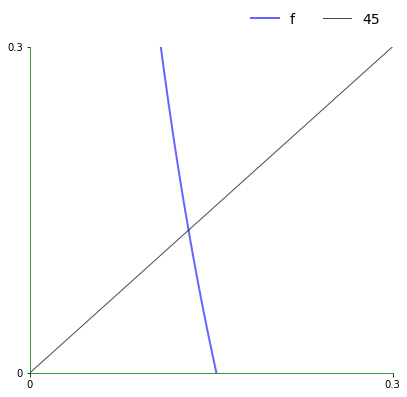

In [70]:
### This block of code is referenced from QuantEcon that produces 45 degree diagrams and time series plots.
### Please see https://python.quantecon.org/scalar_dynam.html

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np

def subplots(fs):
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots(figsize=fs)

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    return fig, ax

def plot45(g, xmin, xmax, x0, num_arrows=6, var='x'):

    xgrid = np.linspace(xmin, xmax, 200)

    fig, ax = subplots((6.5, 6))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)

    hw = (xmax - xmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k", ec="k", head_width=hw,
            length_includes_head=True, lw=1,
            alpha=0.6, head_length=hl)

    ax.plot(xgrid, g(xgrid), 'b-', lw=2, alpha=0.6, label='f')
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    x = x0
    xticks = [xmin]
    xtick_labels = [xmin]

    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(x), **arrow_args) # x, y, dx, dy
        else:
            ax.arrow(x, x, 0.0, g(x) - x, **arrow_args)
            ax.plot((x, x), (0, x), 'k', ls='dotted')

        ax.arrow(x, g(x), g(x) - x, 0, **arrow_args)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i)))

        x = g(x)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i+1)))
        ax.plot((x, x), (0, x), 'k-', ls='dotted')

    xticks.append(xmax)
    xtick_labels.append(xmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)

    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args, fontsize=14)
    plt.show()

xmin = 0
xmax = 0.3

plot45(f, xmin, xmax, 0, num_arrows=0)

In [87]:
##### Program 2.7 Fixed-point iteration in one dimension

# Import package
import numpy as np

# Set initial guesses and chose sigma
xold = 0.05
sigma = 0.2

# Start iteration process
for iter in range(1,201):
    # calculate function value
    f = 0.5 * xold ** (-0.2) +0.5 * xold ** (-0.5) - 2
    # calculate new value
    x = xold + sigma * f
    print('Iter:', iter, abs(x-xold))
    # check for convergence
    if abs(x-xold) < 1e-6:
        print('x = ', x, 'f =', f)
        break
    else:
        # copy old value
        xold = x
#print('Error: no convergence')

Iter: 1 0.229270015802566
Iter: 2 0.08170990088855945
Iter: 3 0.03670456668162733
Iter: 4 0.006549532177659939
Iter: 5 0.00010986589906969435
Iter: 6 1.5120612125996136e-06
Iter: 7 2.1587953868973386e-08
x =  0.1541976406289083 f = -1.0793976934486693e-07


In [54]:
##### Program 2.8 Multidimensional root-finding

# Import package
import numpy as np
from scipy.optimize import fsolve

# Initialize q and function parameters
q0 = ([0.1,0.1])
eta = 1.6
c = ([0.6, 0.8])

# Function that defines the oligopoly equations
def Cournot(q):
    return sum(q) ** (-1/eta) - (1/eta) * sum(q) ** (-(1/eta) - 1) * q - c * q

# Find root
q = fsolve(Cournot, q0)

# Output
print('Firm 1: ', q[0])
print('Firm 2: ', q[1])
print('Price: ', (sum(q) ** (-1/eta)))

Firm 1:  0.8395676035356583
Firm 2:  0.688796431163002
Price:  0.7671110596740338


In [73]:
import numpy as np

def gauss_seidel(A, b, tolerance=1e-10, max_iterations=10000):
    
    x = np.zeros_like(b, dtype=np.double)
    
    #Iterate
    for k in range(max_iterations):
        
        x_old  = x.copy()
        
        #Loop over rows
        for i in range(A.shape[0]):
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i]
            
        #Stop condition 
        if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tolerance:
            break
            
    return x

#ref: Numerical Methods and Programming, retrieved from 
#https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_IterativeSolvers.html

In [104]:
##### Program 2.9 Gauss-Seidel iteration

# Import package
import numpy as np

# Initialize q and function parameters
eta = 1.6
c = ([0.6, 0.8])
qold = np.zeros(2) + 0.1
damp = np.zeros(2) + 0.7

for iter in range(1,201):
    q = (sum(qold) ** (-1/eta) - (1/eta) * sum(qold) ** (-1/eta - 1) * qold) / c
    q = damp * q + (1 - damp) * qold
    # write to screen
    print('Iter:', iter, q)
    # Check for convergence
    if np.ma.all(abs(q-qold)) < 1e-6:
        print('Output:', q)
        break
    else:
        # update q
        qold = q

Iter: 1 [2.22318741 1.67489056]
Iter: 2 [0.98776309 0.7759402 ]
Iter: 3 [0.82822044 0.67777083]
Iter: 4 [0.84125168 0.69021819]
Iter: 5 [0.83933567 0.68860556]
Iter: 6 [0.83959954 0.68882264]
Iter: 7 [0.83956321 0.68879283]
Iter: 8 [0.83956821 0.68879693]
Iter: 9 [0.83956752 0.68879636]
Iter: 10 [0.83956761 0.68879644]
Iter: 11 [0.8395676  0.68879643]
Iter: 12 [0.8395676  0.68879643]
Iter: 13 [0.8395676  0.68879643]
Iter: 14 [0.8395676  0.68879643]
Iter: 15 [0.8395676  0.68879643]
Iter: 16 [0.8395676  0.68879643]
Iter: 17 [0.8395676  0.68879643]
Iter: 18 [0.8395676  0.68879643]
Iter: 19 [0.8395676  0.68879643]
Iter: 20 [0.8395676  0.68879643]
Iter: 21 [0.8395676  0.68879643]
Iter: 22 [0.8395676  0.68879643]
Iter: 23 [0.8395676  0.68879643]
Output: [0.8395676  0.68879643]


In [21]:
import numpy as np
from scipy.optimize import golden

# Initial interval and function values
p = ([1,2])
W = 1 # Normalize the available resources W = 1
a = 0 # a = 0 restricts x2 to be non-negative
b = W / p[1] # Gurantee that x1 is non-negative

# Set starting point
x0 = (a + b) / 2.0 # Set the initial point to be the midpoint of the initial interval

# The utility function
def utility(x):
    return -(((W - p[1] * x) / p[0]) ** 0.4 + (1 + x) ** 0.5)


minimum = golden(utility, brack = (a,b)) # Specifing an initial interval (a,b) 

# Output
print('x1 = ', (W - p[1] * minimum) / p[0])
print('x2 = ', minimum)
print('u  = ', -utility(minimum))
# Note that the scipy.optimize.golden can only search for the global minima

x1 =  1.6131967237506544
x2 =  -0.30659836187532713
u  =  2.043514440866734


In [8]:
##### Program 2.10 Golden-Search method in one dimension

# Import package
import numpy as np
import math

# Initial interval and function values
p = ([1,2])
W = 1
a = 0
b = (W - p[0] * 0.01) / p[1]

# Start iteration process
for iter in range(1,201):
    # calculate x1 and x2 and function values
    x1 = a + (3 - math.sqrt(5)) / 2 * (b-a)
    x2 = a + (math.sqrt(5) - 1) / 2 * (b-a)
    f1 = - (((W - p[1] * x1)/ p[0]) ** 0.4 + (1 + x1) ** 0.5)
    f2 = - (((W - p[1] * x2)/ p[0]) ** 0.4 + (1 + x2) ** 0.5)
    print('Iter:', iter, abs(b-a))
    # check for convergence
    if abs(b-a) < 1e-6:
        print('x1 = ', (W-p[1]*x1)/p[0])
        print('x2 = ', x1)
        print('u  = ', -f1)
        break
    else:
        # get new values
        if f1 < f2:
            b = x2
        else:
            a = x1


Iter: 1 0.495
Iter: 2 0.30592682443119795
Iter: 3 0.18907317556880207
Iter: 4 0.11685364886239592
Iter: 5 0.07221952670640618
Iter: 6 0.04463412215598977
Iter: 7 0.027585404550416415
Iter: 8 0.017048717605573357
Iter: 9 0.01053668694484306
Iter: 10 0.0065120306607303
Iter: 11 0.004024656284112761
Iter: 12 0.0024873743766175398
Iter: 13 0.0015372819074952215
Iter: 14 0.0009500924691223187
Iter: 15 0.000587189438372903
Iter: 16 0.00036290303074941585
Iter: 17 0.00022428640762348724
Iter: 18 0.00013861662312592867
Iter: 19 8.566978449755861e-05
Iter: 20 5.294683862837006e-05
Iter: 21 3.2722945869188566e-05
Iter: 22 2.0223892759181505e-05
Iter: 23 1.2499053110007062e-05
Iter: 24 7.724839649174444e-06
Iter: 25 4.774213460832621e-06
Iter: 26 2.9506261883418247e-06
Iter: 27 1.8235872724907965e-06
Iter: 28 1.1270389158510284e-06
Iter: 29 6.965483566397682e-07
x1 =  0.9999994678844052
x2 =  2.660577974285079e-07
u  =  1.999999920182618


In [72]:
##### Program 2.11 Brent and Powell for finding minima

# Import package
import numpy as np
from scipy.optimize import fmin, brent, minimize_scalar

# Initial interval and function values
p = ([1,2])
W = 1
a = 0
b = (W - p[0] * 0.01) / p[1]

# The utility function
def utility(x):
    return -(((W - p[1] * x) / p[0]) ** 0.4 + (1 + x) ** 0.5)

# Code 1, fmin
res = fmin(utility, x0)
# Output
print('x1 = ', (W - p[1] * res[0]) / p[0])
print('x2 = ', res[0])
print('u  = ', -utility(res[0]))

# Code 2, brent
minimum = brent(utility, brack = (a,b))
# Output
print('x1 = ', (W - p[1] * minimum) / p[0])
print('x2 = ', minimum)
print('u  = ', -utility(minimum))

# Code 3, minimize_scalar
result = minimize_scalar(utility, bracket = (a,b), method = 'brent')
# Output
print('x1 = ', (W - p[1] * result.x) / p[0])
print('x2 = ', result.x)
print('u  = ', -result.fun)

Optimization terminated successfully.
         Current function value: -2.043514
         Iterations: 17
         Function evaluations: 34
x1 =  1.6131425781250048
x2 =  -0.3065712890625024
u  =  2.0435144405437966
x1 =  1.6131967723905305
x2 =  -0.30659838619526525
u  =  2.0435144408667343
x1 =  1.6131967723905305
x2 =  -0.30659838619526525
u  =  2.0435144408667343


In [104]:
##### Program 2.12 Summed trapezoid rule with cos(x)

# Import package
import numpy as np
import math

# Initial parameters
n = 10
a = 0 
b = 2
h = (b - a) / n
x = np.zeros((n+1)) + a + h * np.arange(n+1)

# Get weights
w = np.zeros((n+1))
w[0] = h / 2
w[n] = h / 2
w[1:n] = h
f = []

# Calculate function values at nodes
for i in range(len(x)): 
    f.append(math.cos(x[i])) 

# Output numerical and analytical solution
print('Numerical: ', sum(w*f))
print('Analytical: ', math.sin(2)-math.sin(0))

Numerical:  0.9062644128156156
Analytical:  0.9092974268256817


In [108]:
##### Program 2.13 Gauss-Legendre quadrature with cos(x)

# Import package
import numpy as np
import math
from numpy.polynomial import legendre

# Initial values
n = 10
a = 0
b = 2
f = lambda x: np.cos(x)

# Gauss-Legendre (default interval is [-1, 1])
x, w = legendre.leggauss(n)

# Translate x values from the interval [-1, 1] to [a, b]
t = 0.5*(x + 1)*(b - a) + a
gauss = f((x + 1) * (b - a) / 2 + a)

# Output
print('Numerical: ', sum(w*gauss))
print('Analytical: ', math.sin(2)-math.sin(0))

Numerical:  0.9092974268256817
Analytical:  0.9092974268256817


In [229]:
##### Program 2.14 Agricultural problem

# Import package
import numpy as np
import math
from scipy.optimize import fsolve
from scipy.stats import norm

# Initial values
mu = 1
sig2 = 0.1
minp = 1
n = 10
A0 = 1
sigma = np.sqrt(sig2)

# Discritize y
y = norm.rvs(size=n,loc=mu,scale=sigma)
w = norm.pdf(y,loc=mu,scale=sigma)
for i in range(0,n):
    w[i] = w[i]/sum(w)
    
# Define market function
def marketfun(x):
    p = (3-2*x*y)
    max_res = []
    for i in range(n):
        max_res.append(max(p[i], minp))
    Ep = sum(w * max_res)
    market = x - (0.5 + 0.5 * Ep)
    return market

# Get optimum
A = fsolve(marketfun,A0)

# Get expectation and variance of price
p = (3-2*A*y)
max_res = []
for i in range(n):
    max_res.append(max(p[i], minp))
Ep = sum(w * max_res)
Varp = sum((w * max_res - Ep) ** 2)

# Output
print('A      = ', A)
print('E(p)   = ', Ep)
print('Var(p) = ', Varp)

A      =  [1.46912007]
E(p)   =  1.9382401348534901
Var(p) =  30.528829209992395


Text(0.5, 1.0, 'Binomial Distribution')

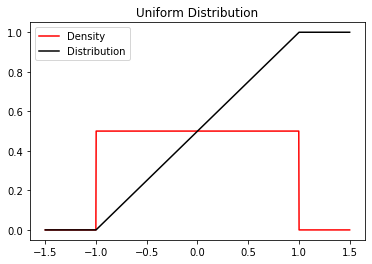

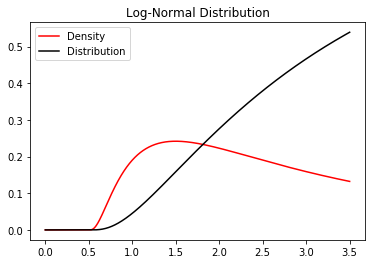

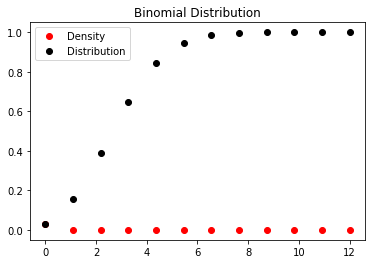

In [241]:
##### Program 2.15 Density and cumulative distribution functions
%matplotlib inline 

# Import package
import numpy as np
import math
from scipy.stats import uniform, lognorm, binom
import matplotlib.pyplot as plt

# Initial set up
NN = 1000

# Uniform distribution
a = -1
b = 1
z = np.linspace(a-0.5, b+0.5, NN)
uniform_distribution = uniform(loc=a, scale=(b-a))
dens = uniform_distribution.pdf(z)
dist = uniform_distribution.cdf(z)

fig, ax = plt.subplots(1, 1)
ax.plot(z, dens, 'r-', label='Density')
ax.plot(z, dist, 'k-', label='Distribution')
plt.legend()
plt.title('Uniform Distribution')

# Log-normal distribution
mu = 1
sigma = 0.25
z = np.linspace(0, mu+5*np.sqrt(sigma), NN)
lognorm_distribution = lognorm(1, loc=np.sqrt(sigma), scale=np.exp(mu))
dens = lognorm_distribution.pdf(z)
dist = lognorm_distribution.cdf(z)

fig, bx = plt.subplots(1, 1)
bx.plot(z, dens, 'r-', label='Density')
bx.plot(z, dist, 'k-', label='Distribution')
plt.legend()
plt.title('Log-Normal Distribution')

# Binomial distribution
p = 0.25
n = 12
z = np.linspace(0,n,n)
binomial_distribution = binom(n, p)
dens = binomial_distribution.pmf(z)
dist = binomial_distribution.cdf(z)

fig, cx = plt.subplots(1, 1)
cx.plot(z, dens, 'ro', label='Density')
cx.plot(z, dist, 'ko', label='Distribution')
plt.legend()
plt.title('Binomial Distribution')

Text(0.5, 1.0, 'Binomial Distribution')

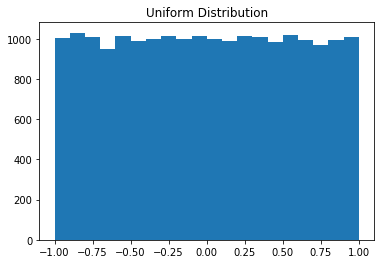

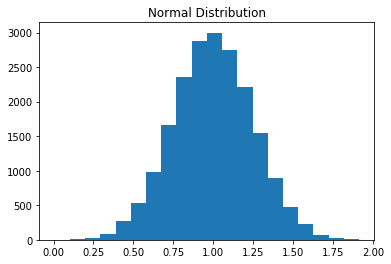

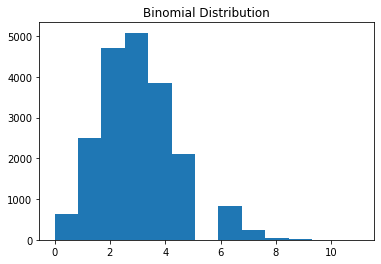

In [239]:
##### Program 2.16 Density and cumulative distribution functions
%matplotlib inline 

# Import package
import numpy as np
import math
from scipy.stats import uniform, lognorm, binom
import matplotlib.pyplot as plt

# Initial set up
NN = 20000

# Uniform distribution
a = -1
b = 1
x = np.random.uniform(a, b, NN)

fig, ax = plt.subplots(1, 1)
plt.hist(x, 20)
plt.title('Uniform Distribution')

# Log-normal distribution
mu = 1
sigma = 0.25
x = np.random.normal(mu, sigma, NN)

fig, bx = plt.subplots(1, 1)
plt.hist(x, 20)
plt.title('Normal Distribution')

# Binomial distribution
p = 0.25
n = 12
x = np.random.binomial(n, p, NN)

fig, cx = plt.subplots(1, 1)
plt.hist(x, n+1)
plt.title('Binomial Distribution')

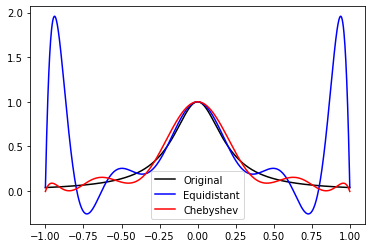

In [284]:
##### Program 2.17 Polynomial interpolation of Runge's function

%matplotlib inline 
# Import package
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate,krogh_interpolate

# Initial set up
N = 10
NN = 1000

# Get equidistant plot nodes and Runge's function
xplot = np.linspace(-1, 1, NN+1)
yreal = 1/(1+25*xplot**2)
fig, ax = plt.subplots(1, 1)
ax.plot(xplot, yreal, 'k-', label = 'Original')

# Equidistant polynomial interpolation
xi = np.linspace(-1, 1, N+1)
yi = 1/(1+25*xi**2)
yplot = krogh_interpolate(xi,yi,xplot)
ax.plot(xplot, yplot, 'b-', label = 'Equidistant')

# Chebyshev polynomial interpolation
def grid_Cons_Chev(a,b,N):
    "This function Creates N Chebychev nodes on the interval [a,b] "
    x = np.zeros(N+1)
    for n in range(N+1):
        x[n] = (a+b)/2 + (b-a)/2*math.cos(np.pi*((2*(N-n)+1)/(2*N+2)))
    return x
xc = grid_Cons_Chev(-1, 1, N)
yc = 1/(1+25*xc**2)
yplot2 = barycentric_interpolate(xc,yc,xplot)
ax.plot(xplot, yplot2, 'r-', label = 'Chebyshev')
plt.legend()


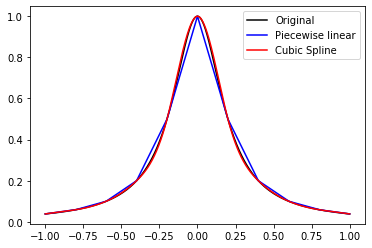

In [294]:
##### Program 2.18 Piecewise linear and cubic spline interpolation

# Import package
import numpy as np
import math
from scipy.interpolate import splrep,splev

# Initial set up
N = 10
NN = 1000

# Get nodes and data for interpolation
xi = np.linspace(-1,1,N+1)
yi = 1/(1+25*xi**2)

# Get nodes and data for plotting
xplot = np.linspace(-1,1,NN+1)
yreal = 1/(1+25*xplot**2)
fig, ax = plt.subplots(1, 1)
ax.plot(xplot, yreal, 'k-', label = 'Original')

# Piecewise linear interpolation
yplot = np.interp(xplot, xi, yi)
ax.plot(xplot, yplot, 'b-', label = 'Piecewise linear')

# Cubic spline interpolation
splines = splrep(xi, yi)
yplot2 = splev(xplot, splines)
ax.plot(xplot, yplot2, 'r-', label = 'Cubic Spline')
plt.legend()

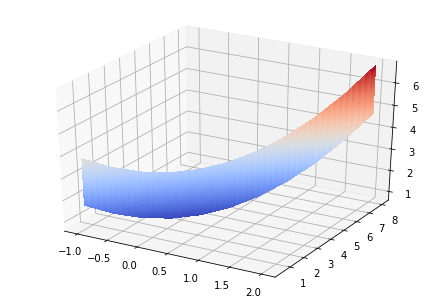

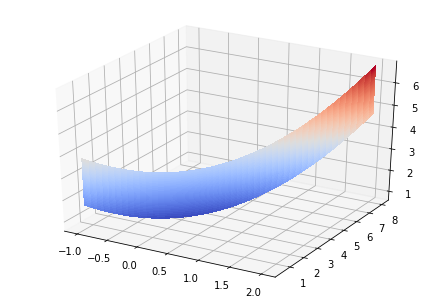

In [301]:
##### Program 2.19 Two-dimensional interpolation

# Import package
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math
from scipy.interpolate import splrep,splev,interp2d

# Define plot data
def plot_data(x, y, z):
    fig = plt.figure()
    #ax = fig.gca(projection='3d')
    ax = Axes3D(fig)
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Initial set up
nx = 10
nz = 20
nerr = 1000
xl = -1
xr = 2
zl = 0.5
zr = 8

# Get nodes and data for interpolation
xi = np.linspace(xl,xr,nx+1)
zi = np.linspace(zl,zr,nz+1)
xx, zz = np.meshgrid(xi, zi)
yi = xx ** 2 + np.sqrt(zz)

# Piecewise linear interpolation
f = interp2d(xi, zi, yi, kind='linear')
xerr = np.linspace(xl,xr,nerr+1)
zerr = np.linspace(zl,zr,nerr+1)
xx_v, zz_v=np.meshgrid(xerr, zerr) 
y_li = f(xerr, zerr)
plot_data(xerr, zerr, y_li)

# Cubic spline interpolation
g = interp2d(xi, zi, yi, kind='cubic')
y_sp = g(xerr, zerr)
plot_data(xerr, zerr, y_sp)

In [2]:
##### Program 2.20 Simplex algorithm for linear programs

# Import package
import numpy as np
import math
from scipy.optimize import linprog

# Set up matrix, target vector and coefficients
A = np.zeros((3,2))
A[0,:] = ([1,1])
A[1,:] = ([4,1])
A[2,:] = ([20,10])
b = np.array([100,160,1100])
c = np.array([-120,-40])

# Solve linear program
res = linprog(c, A_ub=A, b_ub=b)

# Output
print('x      = ', res.x)
print('Cons 1 = ', b[0]-sum(A[0,:]*res.x))
print('Cons 2 = ', b[1]-sum(A[1,:]*res.x))
print('Cons 3 = ', b[2]-sum(A[2,:]*res.x))

x      =  [25. 60.]
Cons 1 =  15.000000000953094
Cons 2 =  1.7715819922159426e-09
Cons 3 =  1.22590790851973e-08
